# Описание
Вы когда-нибудь задумывались, в какое время года лучше всего бронировать номер в отеле? Или оптимальную продолжительность пребывания, чтобы получить лучший дневной тариф? Что, если вы хотите предсказать, получит ли отель непропорционально большое количество специальных запросов?

Выясним, когда меньше всего приезжает людей с детьми

# Загрузка данных
Подключаем библиотеки.
Подключим гугл лиск, чтобы брать данные из него


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')

#with open('/content/drive/My Drive/ML/foo.txt', 'w') as f:
 # f.write('FDHYRTH!')


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/ML/hotel_bookings.csv')
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
# проверка, сколько всего строк
df.count()

hotel                             119390
is_canceled                       119390
lead_time                         119390
arrival_date_year                 119390
arrival_date_month                119390
arrival_date_week_number          119390
arrival_date_day_of_month         119390
stays_in_weekend_nights           119390
stays_in_week_nights              119390
adults                            119390
children                          119386
babies                            119390
meal                              119390
country                           118902
market_segment                    119390
distribution_channel              119390
is_repeated_guest                 119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
reserved_room_type                119390
assigned_room_type                119390
booking_changes                   119390
deposit_type                      119390
agent                             103050
company         

# 1.	Предварительная обработка данных

## обрабатываем

Проверяем типы данных столбцов

In [ ]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

Определим, какие значения может принимать каждый столбец

In [ ]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
df['is_canceled'].unique()

array([0, 1])

In [ ]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [ ]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [ ]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [ ]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [ ]:
df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [ ]:
df['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

Рассмотирм каждый столбец отдельно и определим, поможет ли этот столбец добиться результата
- is_canceled                         да/нет

Эту информацию нужно оставить для того, чтобы знать, заселился ли в итоге человек или нет. Также благодаря этому значению можно узнать спрос
- lead_time - Количество дней, прошедших между датой бронирования и датой прибытия

Эта информация пригодится для того, чтобы узнать, за какое время люди начинают бронировать отели
- arrival_date_year - год поездки

Оставляем, чтобы посчитать итоговое количество людей
- arrival_date_month - месяц поездки
- arrival_date_week_number - номер недели года на начало поездки
- arrival_date_day_of_month - день поездки (дата)
- stays_in_weekend_nights - Количество ночей выходного дня (суббота или воскресенье), которые гость провел или забронировал для проживания в отеле
- stays_in_week_nights - Количество ночей в неделю (с понедельника по пятницу), в течение которых гость останавливался или забронировал проживание в отеле
- adults - количество врозслых
- children - количество детей
- babies - количество младенцев
- meal - Типы питания в отелях: OB, BB, HB, FB, AI, UAI
- country - страна гостя

Можно использовать для определения сезона, когда приезжает больше всего иностранцев. Для таких периодов можно нанять сезонный персонал, который знает язык
- market_segment - определение сегмента рынка. В категориях термин “TA” означает “Туристические агенты”, а “TO” означает “туроператоры”

На результат не повлияет, можно удалить
- distribution_channel - как забронирован отель
- is_repeated_guest - гость едет не в 1 раз

На результат не повлияет, можно удалить
- previous_cancellations - количество предыдущих бронирований, не отмененных клиентом до текущего бронирования

Этот столбец неинформативен, удаляем
- previous_bookings_not_canceled - количество предыдущих бронирований, отмененных клиентом до текущего бронирования

Удаляем
- reserved_room_type - код зарезервированного типа номера.

Тип номера влияет на его стоимость, поэтому оставляем
- assigned_room_type - код для типа номера, присвоенного бронированию.

Удаляем
- booking_changes - количество изменений, внесенных в бронирование

На результат не повлияет, можно удалить
- deposit_type - внесен ли депозит

На результат не повлияет, можно удалить
- agent - идентификатор туристического агентства, сделавшего бронирование
- company - идентификатор компании / организации, сделавшей бронирование
- days_in_waiting_list - количество дней, в течение которых бронирование находилось в списке ожидания, прежде чем оно было подтверждено клиенту

По этим данным можно узанать, сколько придется ждать подтверждения бронирования, если мы решиим ехать
- customer_type - тип бронирования: Contract, Group, Transient, Transient-party

Нам эта информация не важна, поэтому удаляем
- adr - средняя дневная ставка, определяемая путем деления суммы всех сделок по размещению на общее количество ночей проживания.
- required_car_parking_spaces - количество парковочных мест, требуемых заказчиком
- total_of_special_requests - количество особых запросов с уточнениями и пожеланиями

На результат не повлияет, можно удалить
- reservation_status - статус бронирования: Canceled (отменено клиентом), Check-Out (клиент уже уехал), No-Show (клиент не явился)
- reservation_status_date - дата последнего обновления статуса

Удаляем

## Замена категориальных переменных


Так как нам не важно, какая компания или агент совершили бронирование, объединиим эти два столбца и заполним данными:
* 0 - клиент самостоятельно сделал бронирование
* 1 - бронирование сделал агент или компания

In [ ]:
#for i in range(df['hotel'].count().astype(int)):
  # (df.iloc[i]) - первое число - номер строки, второе - номер столбца

In [ ]:
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)
df['how_booking'] = df['agent'] + df['company']
df.loc[(df.how_booking != 0), 'how_booking'] = 1
df['how_booking'] = df['how_booking'].astype(int)

В датасете месяца записаны буквами, перепишем их числами

In [ ]:
mes = {"arrival_date_month":
       {"January": 1,
       "February": 2,
        "March": 3,
        "April": 4,
        "May": 5,
        "June": 6,
        "July": 7,
        "August": 8,
        "September": 9,
        "October": 10,
        "November": 11,
        "December": 12},
}
df = df.replace(mes)

## Переименование столбцов

In [ ]:
df = df.rename(columns={"adr": "price"})

## Очистка данных

Удалим столбцы
axis=1 - удаление столбцов
axis=0 - удлаение строк
inplace=True изменяем текущий датафрейм, а не порождаем новый

In [ ]:
 df = df.drop([ 'arrival_date_week_number', 'market_segment', 'is_repeated_guest', 'previous_cancellations', 'distribution_channel', 'previous_bookings_not_canceled', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'customer_type', 'total_of_special_requests', 'reservation_status_date'], axis=1, inplace=False)

 df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,reserved_room_type,days_in_waiting_list,price,required_car_parking_spaces,reservation_status,how_booking
0,Resort Hotel,0,342,2015,7,1,0,0,2,0.0,0,BB,PRT,C,0,0.0,0,Check-Out,0
1,Resort Hotel,0,737,2015,7,1,0,0,2,0.0,0,BB,PRT,C,0,0.0,0,Check-Out,0
2,Resort Hotel,0,7,2015,7,1,0,1,1,0.0,0,BB,GBR,A,0,75.0,0,Check-Out,0
3,Resort Hotel,0,13,2015,7,1,0,1,1,0.0,0,BB,GBR,A,0,75.0,0,Check-Out,1
4,Resort Hotel,0,14,2015,7,1,0,2,2,0.0,0,BB,GBR,A,0,98.0,0,Check-Out,1


### Удаление пропусков


Удалим пустые строчки
Этот шаг в основном похож на предыдущий, но здесь все отсутствующие значения определяются и отбрасываются. Также применяются тактики замены отсутствующих значений средним значением или средним значением этого столбца. В данном случае пропущено 99 значений - достаточная низкая доля всего набора данных из 10000 значений, поэтому удаление строк с пропущенными значениями не критично.

Сначала выведем, сколько есть пропусков

In [ ]:
print(df.isnull().sum())

hotel                            0
is_canceled                      0
lead_time                        0
arrival_date_year                0
arrival_date_month               0
arrival_date_day_of_month        0
stays_in_weekend_nights          0
stays_in_week_nights             0
adults                           0
children                         4
babies                           0
meal                             0
country                        488
reserved_room_type               0
days_in_waiting_list             0
price                            0
required_car_parking_spaces      0
reservation_status               0
how_booking                      0
dtype: int64


Как можно заметить, пустых значений country и children немного относительно всего датасета, поэтому можем удалить строки с пустыми значениями.

In [ ]:
df=df.dropna(axis=0,inplace=False)
print(df.isnull().sum()) # После удаления

hotel                          0
is_canceled                    0
lead_time                      0
arrival_date_year              0
arrival_date_month             0
arrival_date_day_of_month      0
stays_in_weekend_nights        0
stays_in_week_nights           0
adults                         0
children                       0
babies                         0
meal                           0
country                        0
reserved_room_type             0
days_in_waiting_list           0
price                          0
required_car_parking_spaces    0
reservation_status             0
how_booking                    0
dtype: int64


Количество детей - целое число, поэтому преобразуем float в int

In [ ]:
df['children'] = df['children'].astype(int)

### Удаление дубликатов

In [ ]:
df.shape #сколько изначально строк

(118898, 19)

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape) # Сколько таких строк
df = df.drop_duplicates()

number of duplicate rows:  (35522, 19)


In [ ]:
df.count() # Сколько строк данных осталось

hotel                          83376
is_canceled                    83376
lead_time                      83376
arrival_date_year              83376
arrival_date_month             83376
arrival_date_day_of_month      83376
stays_in_weekend_nights        83376
stays_in_week_nights           83376
adults                         83376
children                       83376
babies                         83376
meal                           83376
country                        83376
reserved_room_type             83376
days_in_waiting_list           83376
price                          83376
required_car_parking_spaces    83376
reservation_status             83376
how_booking                    83376
dtype: int64

## Определение выбросов


Выброс - это точка или набор точек, которые отличаются от других точек. Характеризуются очень высокими или очень низкими. Часто бывает полезно обнаружить и удалить выбросы. Выбросы являются одной из основных причин, приводящих к созданию менее точной модели. Часто выбросы можно увидеть с помощью визуализации, используя т.н. “ящик с усами”.

На всех графиках можно увидеть, что некоторые точки выходят за пределы коробки - это не что иное, как выбросы.

Так как в таблицах присутствует два разных типа отеля, будем строить графики для двух случаев

In [ ]:
 df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,reserved_room_type,days_in_waiting_list,price,required_car_parking_spaces,reservation_status,how_booking
0,Resort Hotel,0,342,2015,7,1,0,0,2,0,0,BB,PRT,C,0,0.0,0,Check-Out,0
1,Resort Hotel,0,737,2015,7,1,0,0,2,0,0,BB,PRT,C,0,0.0,0,Check-Out,0
2,Resort Hotel,0,7,2015,7,1,0,1,1,0,0,BB,GBR,A,0,75.0,0,Check-Out,0
3,Resort Hotel,0,13,2015,7,1,0,1,1,0,0,BB,GBR,A,0,75.0,0,Check-Out,1
4,Resort Hotel,0,14,2015,7,1,0,2,2,0,0,BB,GBR,A,0,98.0,0,Check-Out,1


Построим ящик с усами для цены и типа комнаты

In [ ]:
df['reserved_room_type'].value_counts()

A    53152
D    17025
E     5909
F     2795
G     2030
B      956
C      906
H      596
L        6
P        1
Name: reserved_room_type, dtype: int64

Заметим, что комнату типа Р выбирали всего 1 раз, поэтому это значение можно убрать

In [ ]:
# loc () – Извлечение значений из набора данных
df = df.loc[df['reserved_room_type'] != 'P']

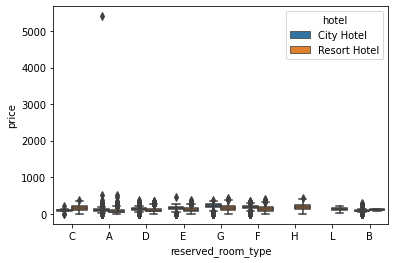

In [ ]:
sns.boxplot(x="reserved_room_type",
            y="price",
            hue="hotel",
            data=df,
            hue_order=["City Hotel", "Resort Hotel"])

Мы видим большой выброс у комнаты типа А. Это единственное значение, которое выбивается, поэтому удалим его

In [ ]:
# loc () – Извлечение значений из набора данных
df = df.loc[df['price'] != df['price'].max()]

Вернемся к ящику с усами

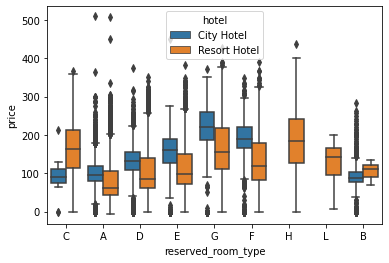

In [ ]:
sns.boxplot(x="reserved_room_type",
            y="price",
            hue="hotel",
            data=df,
            hue_order=["City Hotel", "Resort Hotel"])

На этом рисунке показана средняя цена за номер в зависимости от его типа.
ОДнако из-за анонимности данных мы не можем быть уверены в том, что номера с одинаковой буквой будут одинаковы в разных отелях

Посмотрим на ящик с усами у цены и типа питания

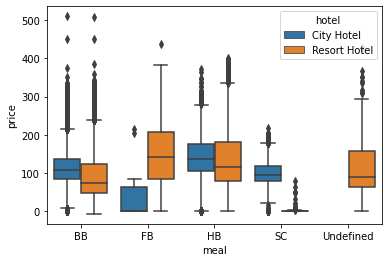

In [ ]:
sns.boxplot(x="meal",
            y="price",
            hue="hotel",
            data=df,
            hue_order=["City Hotel", "Resort Hotel"])

In [ ]:
df['adults'].value_counts()

2     62110
1     14985
3      5837
0       367
4        59
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

In [ ]:
df = df.loc[df['adults'] != 0]
df = df.loc[df['adults'] < 6]
df = df.loc[df['children'] < 10]
df['adults'].value_counts()

2    62109
1    14985
3     5837
4       59
5        2
Name: adults, dtype: int64

Посчитаем межквартильный размах

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

is_canceled                      1.000
lead_time                      112.000
arrival_date_year                1.000
arrival_date_month               5.000
arrival_date_day_of_month       15.000
stays_in_weekend_nights          2.000
stays_in_week_nights             3.000
adults                           0.000
children                         0.000
babies                           0.000
days_in_waiting_list             0.000
price                           61.175
required_car_parking_spaces      0.000
how_booking                      0.000
dtype: float64


Удаление выбросов. Этот шаг лучше не делать, потому что удаляется больше половины данных

In [ ]:
#df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
#df.shape

In [ ]:
df.dtypes

hotel                           object
is_canceled                      int64
lead_time                        int64
arrival_date_year                int64
arrival_date_month               int64
arrival_date_day_of_month        int64
stays_in_weekend_nights          int64
stays_in_week_nights             int64
adults                           int64
children                         int64
babies                           int64
meal                            object
country                         object
reserved_room_type              object
days_in_waiting_list             int64
price                          float64
required_car_parking_spaces      int64
reservation_status              object
how_booking                      int64
dtype: object

## Гистограммы


Гистограмма показывает встречаемость переменных в интервале.

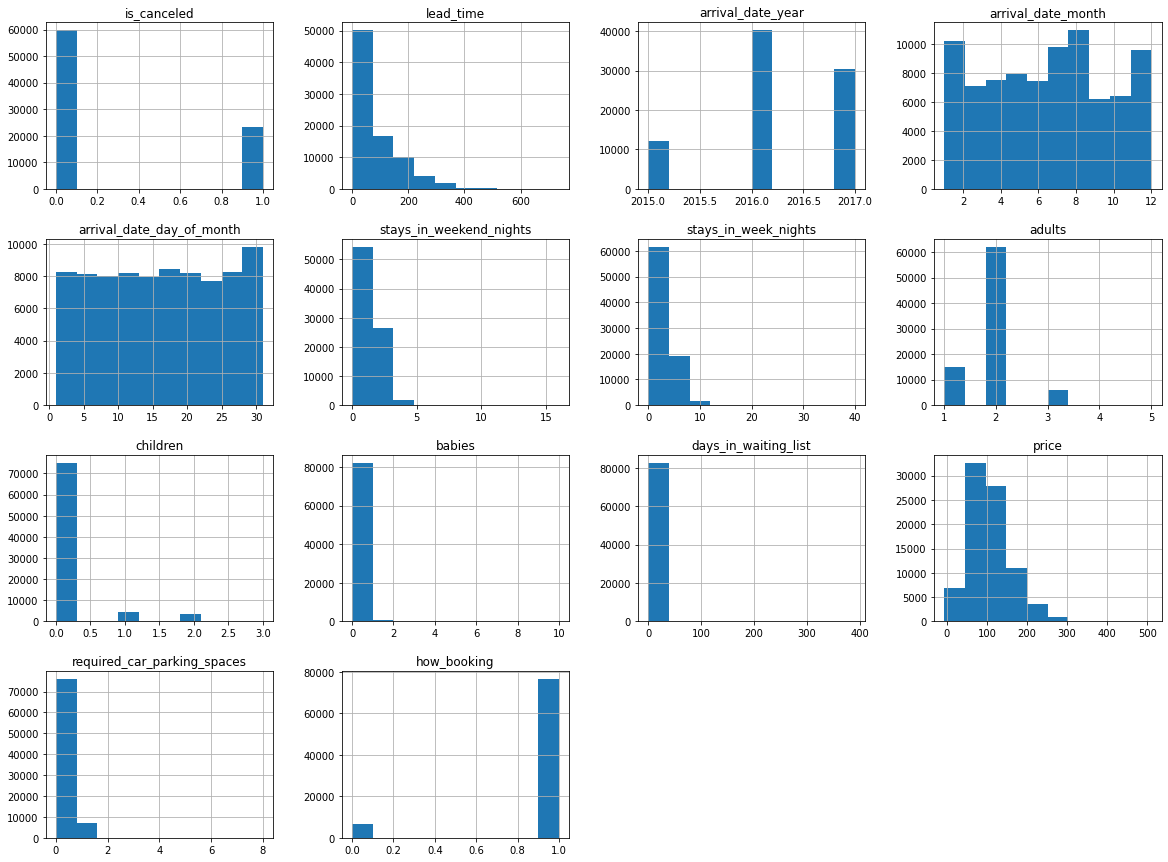

In [ ]:
df.hist(figsize=(20,15))
plt.show()

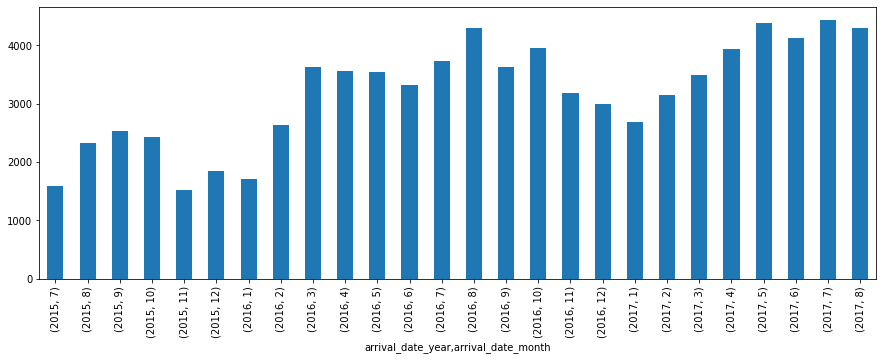

In [ ]:
df.groupby(['arrival_date_year', 'arrival_date_month']).size().plot.bar(figsize=(15,5))

## Преобразуем данные в числа

In [ ]:
df.dtypes

hotel                           object
is_canceled                      int64
lead_time                        int64
arrival_date_year                int64
arrival_date_month               int64
arrival_date_day_of_month        int64
stays_in_weekend_nights          int64
stays_in_week_nights             int64
adults                           int64
children                         int64
babies                           int64
meal                            object
country                         object
reserved_room_type              object
days_in_waiting_list             int64
price                          float64
required_car_parking_spaces      int64
reservation_status              object
how_booking                      int64
dtype: object

In [ ]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
df['meal'].value_counts()

BB           64577
SC            9237
HB            8443
Undefined      402
FB             333
Name: meal, dtype: int64

In [ ]:
df['reserved_room_type'].value_counts()

A    53021
D    17001
E     5894
F     2790
G     2027
C      905
B      752
H      596
L        6
Name: reserved_room_type, dtype: int64

In [ ]:
mes = {"hotel":
       {"Resort Hotel": 0,
       "City Hotel": 1},
       "meal":
       {"BB": 1,
       "FB": 2,
       "HB": 3,
       "SC": 4,
       "Undefined": 0},
       "reserved_room_type":
       {"A": 0,
       "B": 1,
       "C": 2,
       "D": 3,
       "E": 4,
       "F": 5,
       "G": 6,
       "H": 7,
       "L": 8}
}
df = df.replace(mes)

## Тепловые карты

Тепловые карты - это тип графика, который необходим для поиска зависимых переменных. Один из лучших способов найти взаимосвязь между характеристиками: тепловые карты. На приведенной ниже тепловой карте видно. что ценовая характеристика в основном зависит от мощности и года выпуска

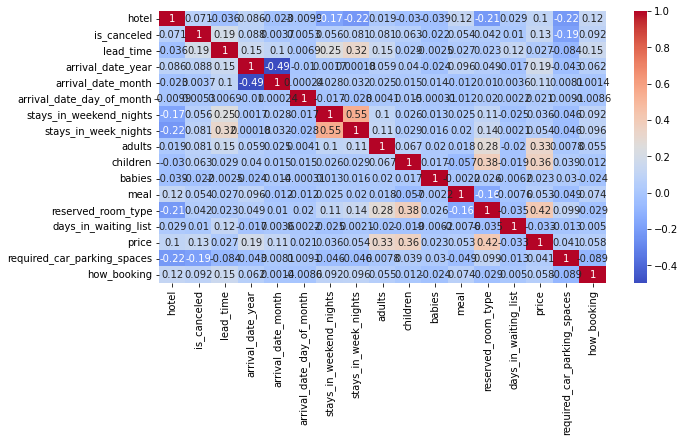

In [ ]:
plt.figure(figsize=(10,5))
c = df.corr()
sns.heatmap(c,cmap="coolwarm",annot=True)

Видим, что больше всего зависят параметры количество дней и количество выходных, что вполне логично.
Также чем больше человек заселяется, тем выше цена.
Есть зависимость между lead_time (количество дней, прошедших между датой бронирования и датой прибытия) и количеством ночей.
Цена зависит от года и месяца, типа номера.
Тип номера зависит от того, будут там жить дети или нет.

## Диаграмма рассеяния

Диаграммы рассеяния используют, чтобы найти корреляцию между двумя переменными.

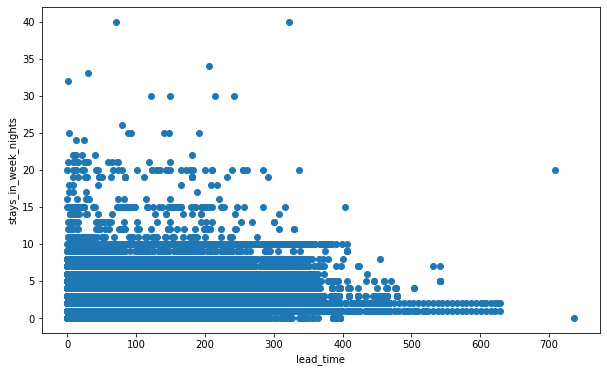

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['lead_time'], df['stays_in_week_nights'])
ax.set_xlabel('lead_time')
ax.set_ylabel('stays_in_week_nights')
plt.show()

Чаще всего люди совершают бронирование меньше, чем за 300 дней до прибытия. Но можно заметить, что чем дольше человек планирует находиться в отеле, тем меньше проходит времени от бронирования до заезда

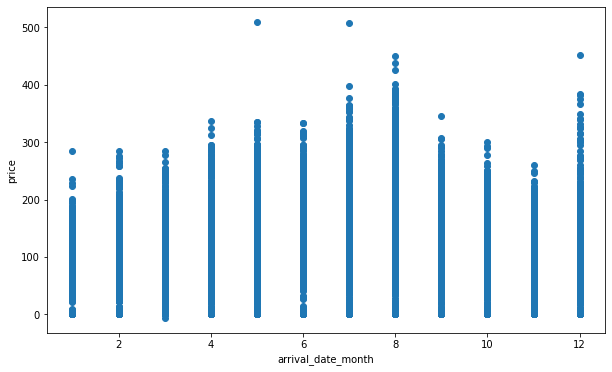

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['arrival_date_month'], df['price'])
ax.set_xlabel('arrival_date_month')
ax.set_ylabel('price')
plt.show()

Дороже всего бронировать отели в августе, но также бывают единичные случаи высокой цены в мае, июле и декабре. Скорее всего это даты выпускных и новый год.

Цена зависит от того, как сделано бронирование

0 - клиент самостоятельно сделал бронирование

1 - бронирование сделал агент или компания

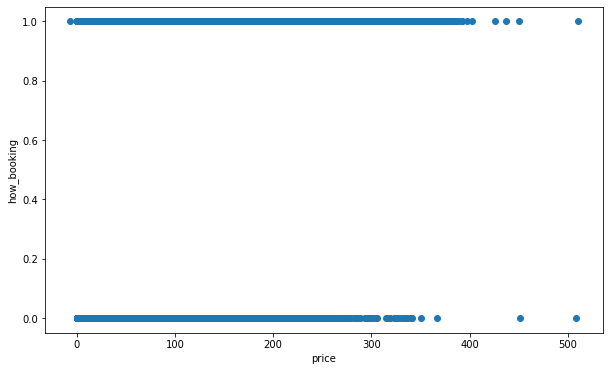

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['price'], df['how_booking'])
ax.set_xlabel('price')
ax.set_ylabel('how_booking')
plt.show()

При бронировании через агента часто встречается высокая цена

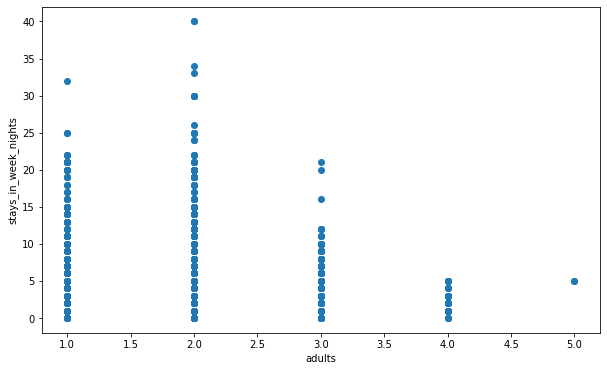

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['adults'], df['stays_in_week_nights'])
ax.set_xlabel('adults')
ax.set_ylabel('stays_in_week_nights')
plt.show()

Люди вдвоем чаще приезжают на большое количество дней

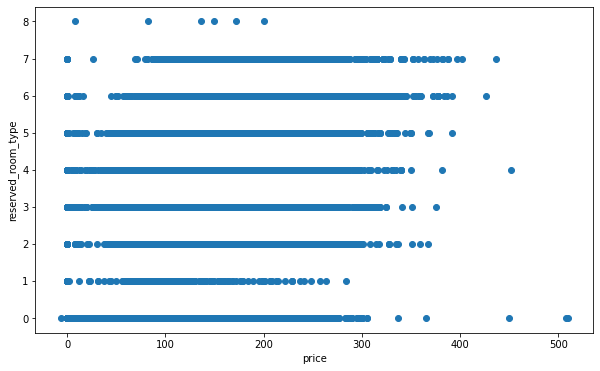

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['price'], df['reserved_room_type'])
ax.set_xlabel('price')
ax.set_ylabel('reserved_room_type')
plt.show()

Чаще всего комната типа 1 стоит дешевле всех. Начальная цена комнаты типа 7 больше остальных

# 2.	Обучение моделей и подбор параметров с помощью Grid Search

## Подключаем библиотеки

In [ ]:
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve

import warnings
warnings.filterwarnings(action='once')

le = preprocessing.LabelEncoder()
%matplotlib inline

## Проверка на сбалансированность данных.

Несбалансированность данных обычно отражает неравное распределение классов в наборе данных.

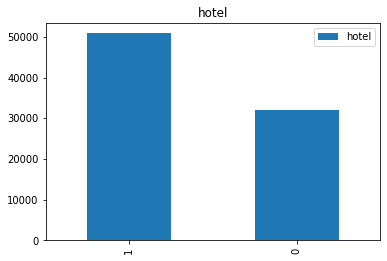

In [ ]:
from sklearn.model_selection import train_test_split

df1 = df.drop([ 'country', 'reservation_status'], axis=1, inplace=False)

X = df1.copy()
X['hotel']  = le.fit_transform(X['hotel']) # Кодировка целевых классов со значением от 0 до n_classes-1.
y = X.pop('hotel') # вырезание и присваивание

y.value_counts().plot(kind='bar', label='hotel')
plt.legend()
plt.title('hotel');

Отеля типа 0 примерно в 2 раза меньше.

Воспользуемся передискретизацией.

Это процесс генерации синтетических данных, который пытается случайным образом сгенерировать выборку атрибутов из наблюдений в классе меньшинства. Существует ряд методов, используемых для передискретизации набора данных для типичной задачи классификации. Самый распространенный метод называется **SMOTE** (Synthetic Minority Over-sampling Technique/метод передискретизации синтетических меньшинств). SMOTE работает, выбирая примеры, которые расположены близко в пространстве признаков. Сначала выбирается случайный пример из класса меньшинства. Затем для этого примера находятся k ближайших соседей (обычно k = 5). Выбирается случайно выбранный сосед и создается синтетический пример в случайно выбранной точке между двумя примерами в пространстве признаков.

In [ ]:
sm = SMOTE()
X, y = sm.fit_resample(X, y)

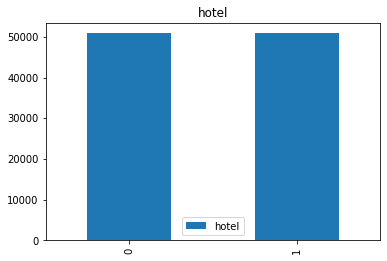

In [ ]:
y.value_counts().plot(kind='bar', label='hotel')
plt.legend()
plt.title('hotel');

## Разбиение данных на обучающую и тестовую выборку

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.33, random_state=42)

feature_names = X_train.columns # для nb

# test_size - доля тестовой выборки
# random_state - перетасовка данных
# StandardScaler удаляет среднее значение и масштабирует данные до единичной дисперсии.
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

функция таймера

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Затрачено времени: %i часов %i минут и %s секунд.' % (thour, tmin, round(tsec, 2)))

## Random Forest

Энтропия — это мера случайности или неопределенности. Уровень энтропии колеблется от 0 до 1. Когда энтропия равна 0, это означает, что подмножество чистое, то есть в нем нет случайных элементов. Когда энтропия равна 1, это означает высокую степень случайности. Энтропия обозначается символами H(S).

In [ ]:
rfc=RandomForestClassifier()
params_rfc = {
    'random_state' : [0, 10, 100, 250],      # случайность выборок
    'n_estimators': [10, 50, 100, 250],      # число деревьев в лесу
    'max_features': ['auto', 'sqrt', 'log2'],# Количество фич, которые следует учитывать при поиске наилучшего разделения
    'max_depth' : [5, 10, 50],               #  глубина дерева
    'criterion' : ['entropy']
}

Найдем лучшие параметры с помощью GridSearch

In [ ]:
random_search = GridSearchCV(
    estimator=rfc,         # модель которую хотим обучать (алгоритм)
    param_grid=params_rfc, # какие параметры хотим подбирать, GridSearchCV на всех параметрах попробует сделать обучение
    cv=2, # перекрёстная проверка (кросс-валидация, Cross-validation), метод, который показывает, что модель не переобучилась
    n_jobs=1) # количество параллельных процессов
start_time = timer(None)
random_search.fit(X_train, y_train) # .ravel() - схлопываем массив в одну строчку
timer(start_time)
print(random_search.best_params_)
print(random_search.best_score_)
rf_bp = random_search.best_params_



 Затрачено времени: 0 часов 21 минут и 2.11 секунд.
{'criterion': 'entropy', 'max_depth': 50, 'max_features': 'auto', 'n_estimators': 250, 'random_state': 250}
0.9228974341035514


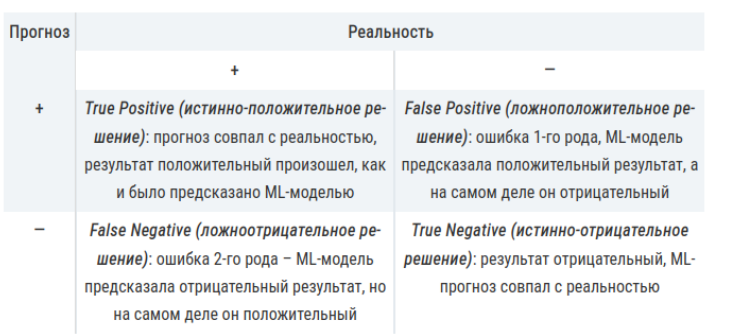

Precision = TP/(TP + FP) (точность) - какой процент прогнозов оказался верным.

Recall = TP/(TP+FN) (полнота) - сколько истинных результатов предсказано верно

F1 Score = 2*(Recall * Precision) / (Recall + Precision) - Какой процент положительных прогнозов оказался верным. Сравнивается сразу полнота и точность. Среднее гармоническое, экстремальные значения исключаются, результат сглаживается

support - количество данных

accuracy - точность прогноза

In [ ]:
model = RandomForestClassifier(**rf_bp)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     16548
           1       0.94      0.94      0.94     17015

    accuracy                           0.94     33563
   macro avg       0.94      0.94      0.94     33563
weighted avg       0.94      0.94      0.94     33563



Обычно чем больше площадь под кривой - тем лучше, также хорошо, когда кривая резко поднимается, т.к. в идеале необходимо максимизировать true positive rate и минимизировать false positive rate

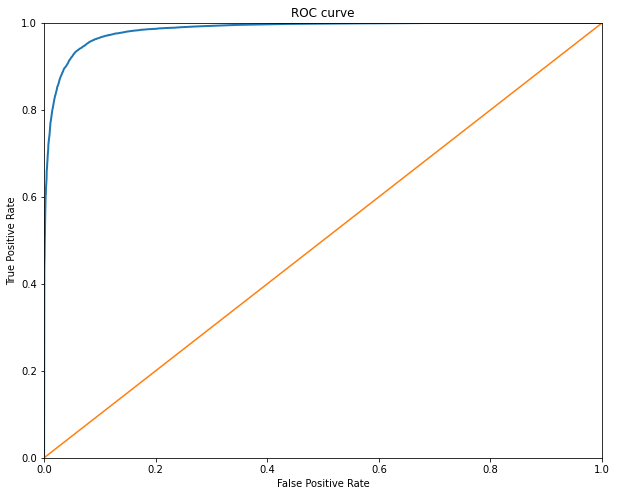

In [ ]:
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test,
                                 model.predict_proba(X_test)[:,1] # вероятность положительного класса
                                 #, pos_label=1 # по умолчанию 1. Обозначает положительный класс
                                 )
lw = 2 # ширина линии
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [ ]:
mat = confusion_matrix(y_test, y_pred)
print(mat)

[[15520  1028]
 [ 1041 15974]]


## KNN. К-ближайших соседей

In [ ]:
params_knn = {
    'n_neighbors' : [2, 5, 10, 15],
    'weights': ['uniform', 'distance'] # uniform - веса у всех одинаковые
}
knn = KNeighborsClassifier()
random_search = GridSearchCV(estimator=knn, param_grid=params_knn, cv = 3, n_jobs=1)
start_time = timer(None)
random_search.fit(X_train, y_train)
timer(start_time)
print(random_search.best_params_)
print(random_search.best_score_)
knn_bp = random_search.best_params_


 Затрачено времени: 0 часов 8 минут и 25.12 секунд.
{'n_neighbors': 10, 'weights': 'distance'}
0.8601910844423862


In [ ]:
model = KNeighborsClassifier(**knn_bp)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87     16548
           1       0.87      0.88      0.88     17015

    accuracy                           0.87     33563
   macro avg       0.87      0.87      0.87     33563
weighted avg       0.87      0.87      0.87     33563



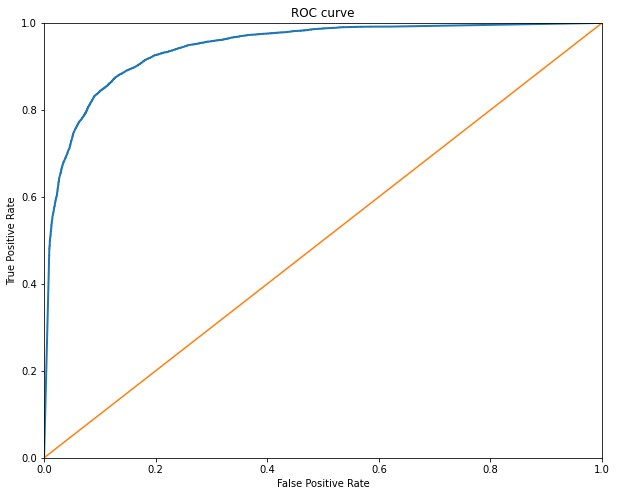

In [ ]:
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test,
                                 model.predict_proba(X_test)[:,1] # вероятность положительного класса
                                 #, pos_label=1 # по умолчанию 1. Обозначает положительный класс
                                 )
lw = 2 # ширина линии
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [ ]:
mat = confusion_matrix(y_test, y_pred)
print(mat)

[[14292  2256]
 [ 2009 15006]]


## XGBoost

In [ ]:
params_boost = {
        'learning_rate': [0.02], # уменьшение размера шага, позволяет избежать перенасыщения
        'random_state' : [0, 10, 100, 250],      # случайность выборок
        'min_child_weight': [1, 5, 10], # если вес окажется меньше, то разбиваться перестанет
        'gamma': [0.5, 1, 5], # Минимальное уменьшение потерь, необходимое для создания дополнительного раздела на листе дерева.
                              # Чем больше гамма, тем более консервативным будет алгоритм.
        'subsample': [0.6,  1.0], # Соотношение подвыборок обучающих экземпляров
        'colsample_bytree': [0.6,  1.0], # доля столбцов для каждой выборки
        'max_depth': [5, 10, 100],
        'n_estimators': [100, 1000] # число деревьев
        }

xgb = XGBClassifier(objective='binary:logistic') # логистическая регрессия

skf = StratifiedKFold(n_splits=5, # количество повторных выборок
                      shuffle = True, # нужно ли перемешивать данные каждого класса перед разделением
                      random_state = 1001) # влияет на порядок индексов при перемешивании

random_search = RandomizedSearchCV(xgb, param_distributions=params_boost,
                                   n_iter=5, #  Количество выборочных настроек параметров.
                                             # балансирует между временем выполнения и качеством решения.
                                   scoring='accuracy', # Стратегия оценки производительности
                                   n_jobs=1,
                                   cv=skf.split(X_train, y_train), # стратегия разделения перекрестной проверки
                                   verbose=3, # отображение индексов параметров
                                   random_state=1001 )
start_time = timer(None)
random_search.fit(X_train, y_train)
timer(start_time)
print(random_search.best_params_)
print(random_search.best_score_)
xgb_bp = random_search.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=10, n_estimators=1000, random_state=100, subsample=1.0;, score=0.907 total time=  42.5s
[CV 2/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=10, n_estimators=1000, random_state=100, subsample=1.0;, score=0.908 total time=  39.2s
[CV 3/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=10, n_estimators=1000, random_state=100, subsample=1.0;, score=0.913 total time=  39.2s
[CV 4/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=10, n_estimators=1000, random_state=100, subsample=1.0;, score=0.907 total time=  39.6s
[CV 5/5] END colsample_bytree=0.6, gamma=1, learning_rate=0.02, max_depth=5, min_child_weight=10, n_estimators=1000, random_state=100, subsample=1.0;, score=0.911 total time=  38.9s
[CV 1/5] END colsample_bytree=

In [ ]:
model = XGBClassifier(objective='binary:logistic', **xgb_bp)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     16548
           1       0.95      0.95      0.95     17015

    accuracy                           0.95     33563
   macro avg       0.95      0.95      0.95     33563
weighted avg       0.95      0.95      0.95     33563



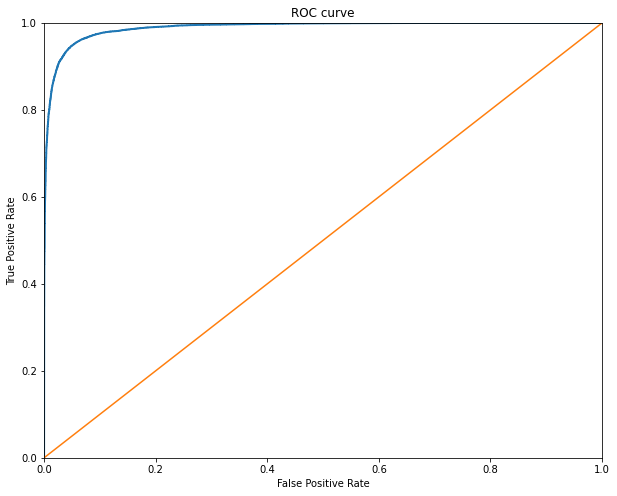

In [ ]:
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test,
                                 model.predict_proba(X_test)[:,1] # вероятность положительного класса
                                 #, pos_label=1 # по умолчанию 1. Обозначает положительный класс
                                 )
lw = 2 # ширина линии
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [ ]:
mat = confusion_matrix(y_test, y_pred)
print(mat)

[[15652   896]
 [  825 16190]]


## Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression

params_rfc = {
    'random_state' : [0, 10, 100, 250],
}

logreg = LogisticRegression()
random_search = GridSearchCV(estimator=logreg, param_grid=params_rfc, cv=2, n_jobs=1)
start_time = timer(None)
random_search.fit(X_train, y_train.values.ravel())
timer(start_time)
print(random_search.best_params_)
print(random_search.best_score_)
rf_bp_logreg = random_search.best_params_


 Затрачено времени: 0 часов 0 минут и 0.98 секунд.
{'random_state': 0}
0.6881411198941778


In [ ]:
model = logreg
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.67      0.68     16548
           1       0.69      0.71      0.70     17015

    accuracy                           0.69     33563
   macro avg       0.69      0.69      0.69     33563
weighted avg       0.69      0.69      0.69     33563



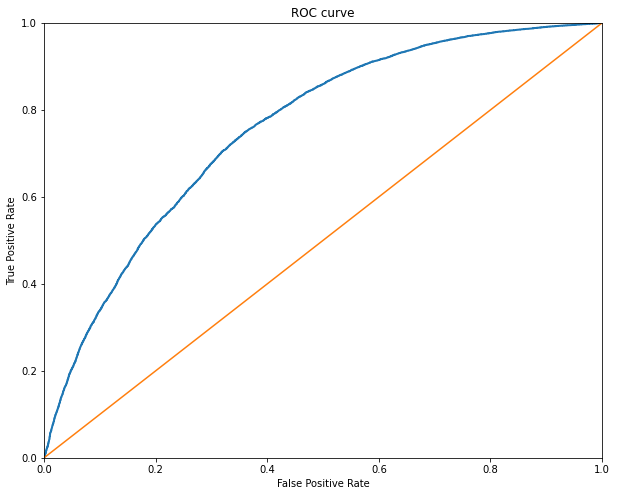

In [ ]:
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test,
                                 model.predict_proba(X_test)[:,1] # вероятность положительного класса
                                 #, pos_label=1 # по умолчанию 1. Обозначает положительный класс
                                 )
lw = 2 # ширина линии
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [ ]:
mat = confusion_matrix(y_test, y_pred)
print(mat)

[[11093  5455]
 [ 4851 12164]]


## Машина опорных векторов (SVM)

In [ ]:
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

from sklearn.svm import SVC

svc = SVC(probability = True)
model = svc
model.fit(X_train_sc, y_train.values.ravel())
y_pred = model.predict(X_test_sc)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88     16548
           1       0.88      0.88      0.88     17015

    accuracy                           0.88     33563
   macro avg       0.88      0.88      0.88     33563
weighted avg       0.88      0.88      0.88     33563



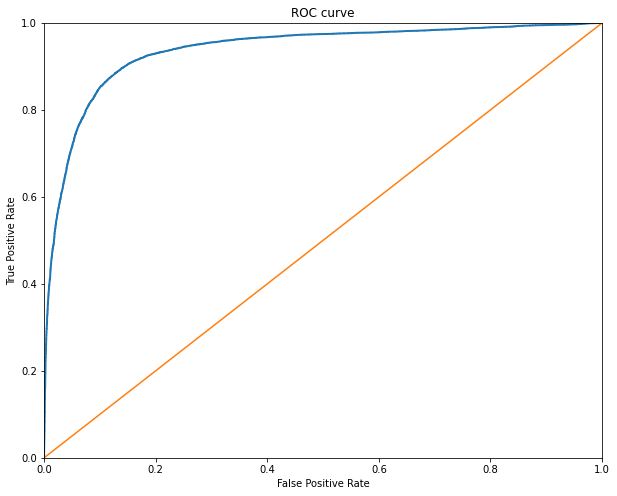

In [ ]:
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test,
                                 model.predict_proba(X_test)[:,1] # вероятность положительного класса
                                 #, pos_label=1 # по умолчанию 1. Обозначает положительный класс
                                 )
lw = 2 # ширина линии
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [ ]:
mat = confusion_matrix(y_test, y_pred)
print(mat)

[[14494  2054]
 [ 2039 14976]]


## Наивный байесовский классификатор

In [ ]:
from sklearn.naive_bayes import BernoulliNB

nb = BernoulliNB()
nb.feature_names_in_ = feature_names

model = nb
model.fit(X_train_sc, y_train.values.ravel())
y_pred = model.predict(X_test_sc)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.62      0.64     16548
           1       0.65      0.68      0.66     17015

    accuracy                           0.65     33563
   macro avg       0.65      0.65      0.65     33563
weighted avg       0.65      0.65      0.65     33563



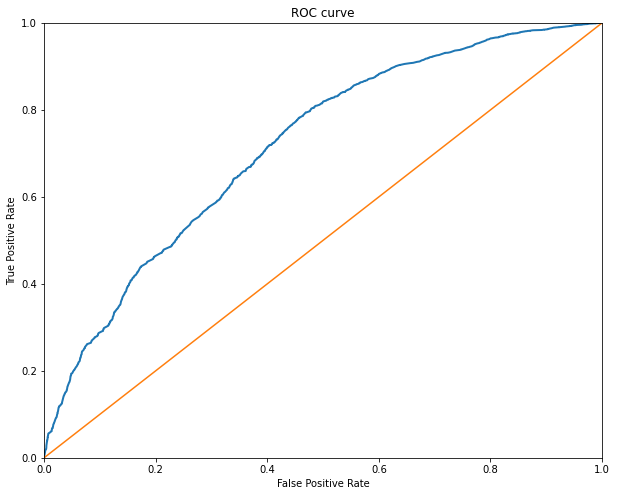

In [ ]:
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(y_test,
                                 model.predict_proba(X_test)[:,1] # вероятность положительного класса
                                 #, pos_label=1 # по умолчанию 1. Обозначает положительный класс
                                 )
lw = 2 # ширина линии
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [ ]:
mat = confusion_matrix(y_test, y_pred)
print(mat)

[[10323  6225]
 [ 5460 11555]]
